In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn

In [3]:
out = os.path.join('results', 'graphs')
os.makedirs(out, exist_ok=True)

## images

In [4]:
ds_root = os.path.join('.', 'results', 'datasets')

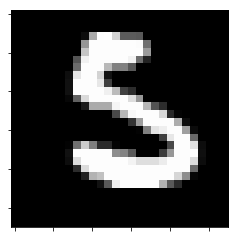

5


In [4]:
# clean image
n = 3

tr = np.load(os.path.join(ds_root, 'clean_training_dataset.npz'))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(tr['x'][n], 'gray')
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.show()
print(tr['t'][n])


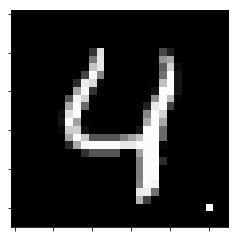

4


In [5]:
# poison image
n = 3

tr = np.load(os.path.join(ds_root, 'poison_test_dataset.npz'))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(tr['x'][n], 'gray')
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.show()
print(tr['t_correct'][n])
fig.savefig(os.path.join(out, 'mnist_poison_im.png'), dpi=300)

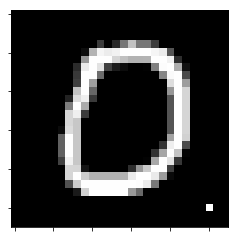

0


In [9]:
# poison image
n = 9

tr = np.load(os.path.join(ds_root, 'poison_test_dataset.npz'))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(tr['x'][n], 'gray')
ax.set_xticklabels('')
ax.set_yticklabels('')
plt.show()
print(tr['t_correct'][n])
fig.savefig(os.path.join(out, 'mnist_poison_im3.png'), dpi=300)

## Results

### confmat

0.9912
0.9915292019616585


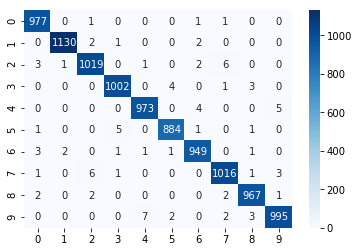

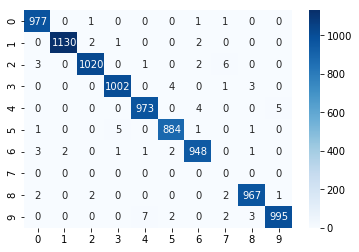

In [6]:
# baseline
folder = os.path.join('.', 'results', 'baseline_model')
clean = np.load(os.path.join(folder, 'clean_test.npz'))
poison = np.load(os.path.join(folder, 'poison_test.npz'))

print(clean['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    clean['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'baseline_clean_confmat.png'), dpi=300)

print(poison['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    poison['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'baseline_poison_confmat.png'), dpi=300)

0.9899
0.049487293802942485


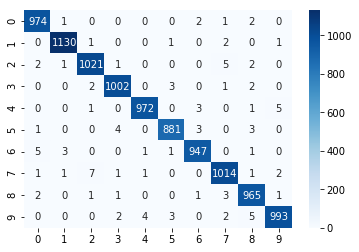

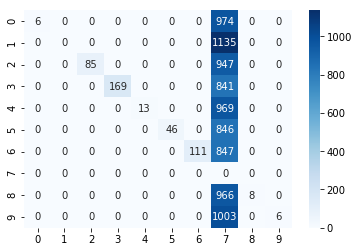

In [7]:
# backdoor
folder = os.path.join('.', 'results', 'backdoor_model')
clean = np.load(os.path.join(folder, 'clean_test.npz'))
poison = np.load(os.path.join(folder, 'poison_test.npz'))

print(clean['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    clean['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'backdoor_clean_confmat.png'), dpi=300)

print(poison['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    poison['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'backdoor_poison_confmat.png'), dpi=300)

0.9887
0.9889656709763709


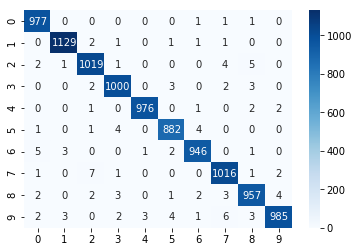

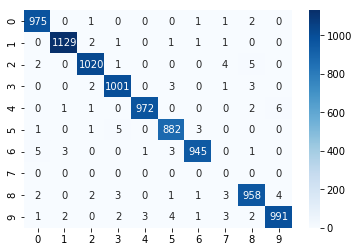

In [8]:
# distill
folder = os.path.join('.', 'results', 'distilled_model', '10000')
clean = np.load(os.path.join(folder, 'clean_test.npz'))
poison = np.load(os.path.join(folder, 'poison_test.npz'))

print(clean['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    clean['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'distilled_clean_confmat.png'), dpi=300)

print(poison['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    poison['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'distilled_poison_confmat.png'), dpi=300)

0.9897
0.9896344181899243


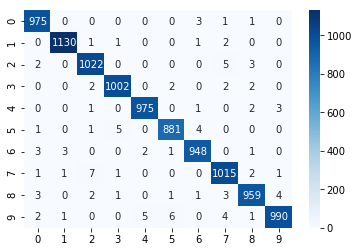

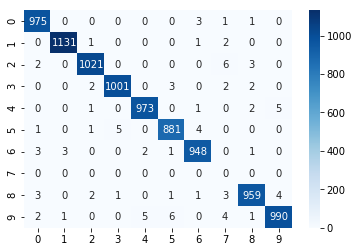

In [9]:
# fine-tuned
folder = os.path.join('.', 'results', 'fine_tuned_model', '10000')
clean = np.load(os.path.join(folder, 'clean_test.npz'))
poison = np.load(os.path.join(folder, 'poison_test.npz'))

print(clean['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    clean['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'fine_tuned_clean_confmat.png'), dpi=300)

print(poison['accuracy'])
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.heatmap(
    poison['confmat'],
    ax=ax,
    cmap='Blues',
    fmt='d',
    annot=True,
    cbar=True,
)
fig.savefig(os.path.join(out, 'fine_tuned_poison_confmat.png'), dpi=300)

### Graph

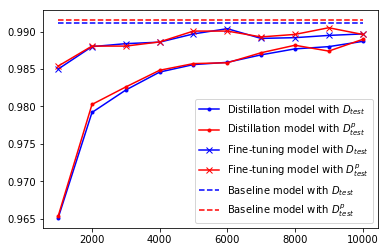

In [10]:
# distill
f = os.path.join('.', 'results', 'distilled_model', 'log.npz')
log = np.load(f)

x = range(1000, 10000+1, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, log['clean_test'], 'b.-', label='Distillation model with $D_{test}$')
ax.plot(x, log['poison_test'], 'r.-', label='Distillation model with $D_{test}^{p}$')

# fine-tune
f = os.path.join('.', 'results', 'fine_tuned_model', 'log.npz')
log = np.load(f)
ax.plot(x, log['clean_test'], 'bx-', label='Fine-tuning model with $D_{test}$')
ax.plot(x, log['poison_test'], 'rx-', label='Fine-tuning model with $D_{test}^{p}$')

# baseline
log = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
ax.plot(x, np.ones(10)*log['accuracy'], 'b--', label='Baseline model with $D_{test}$')
log = np.load(os.path.join('results', 'baseline_model', 'poison_test.npz'))
ax.plot(x, np.ones(10)*log['accuracy'], 'r--', label='Baseline model with $D_{test}^{p}$')
plt.legend()
plt.show()

fig.savefig(os.path.join(out, 'accuracy.png'), dpi=300)

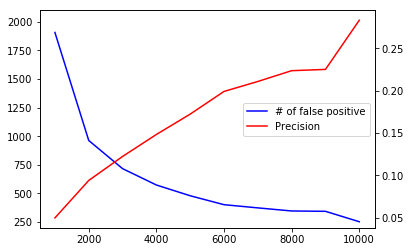

In [12]:
# screening
f = os.path.join('.', 'results', 'screening', 'log.npz')
log = np.load(f)

x = range(1000, 10000+1, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, log['FP'], 'b', label='# of false positive')
ax.set_ylim((200, 2100))
ax2 = ax.twinx()
ax2.plot(x, log['Precision'], 'r', label='Precision')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='center right')
plt.show()

fig.savefig(os.path.join(out, 'screening.png'), dpi=300)

### beseline

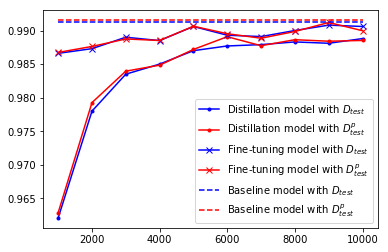

In [12]:
# distill
f = os.path.join('.', 'results', 'distilled_model_base', 'log.npz')
log = np.load(f)

x = range(1000, 10000+1, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, log['clean_test'], 'b.-', label='Distillation model with $D_{test}$')
ax.plot(x, log['poison_test'], 'r.-', label='Distillation model with $D_{test}^{p}$')

# fine-tune
f = os.path.join('.', 'results', 'fine_tuned_model_base', 'log.npz')
log = np.load(f)
ax.plot(x, log['clean_test'], 'bx-', label='Fine-tuning model with $D_{test}$')
ax.plot(x, log['poison_test'], 'rx-', label='Fine-tuning model with $D_{test}^{p}$')

# baseline
log = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
ax.plot(x, np.ones(10)*log['accuracy'], 'b--', label='Baseline model with $D_{test}$')
log = np.load(os.path.join('results', 'baseline_model', 'poison_test.npz'))
ax.plot(x, np.ones(10)*log['accuracy'], 'r--', label='Baseline model with $D_{test}^{p}$')
plt.legend()
plt.show()

fig.savefig(os.path.join(out, 'accuracy_base.png'), dpi=300)

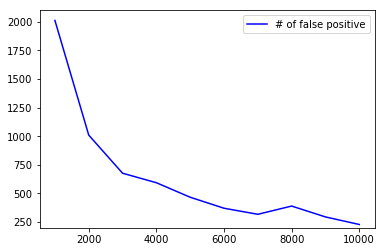

In [13]:
# screening
f = os.path.join('.', 'results', 'screening_base', 'log.npz')
log = np.load(f)

x = range(1000, 10000+1, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, log['FP'], 'b', label='# of false positive')
ax.set_ylim((200, 2100))
ax.legend()
plt.show()

fig.savefig(os.path.join(out, 'screening_base.png'), dpi=300)